# <center> <u> Cross Validation on Car sale dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Car_sales.csv', parse_dates=['Latest_Launch'])

In [3]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         157 non-null    object        
 1   Model                157 non-null    object        
 2   Sales_in_thousands   157 non-null    float64       
 3   __year_resale_value  121 non-null    float64       
 4   Vehicle_type         157 non-null    object        
 5   Price_in_thousands   155 non-null    float64       
 6   Engine_size          156 non-null    float64       
 7   Horsepower           156 non-null    float64       
 8   Wheelbase            156 non-null    float64       
 9   Width                156 non-null    float64       
 10  Length               156 non-null    float64       
 11  Curb_weight          155 non-null    float64       
 12  Fuel_capacity        156 non-null    float64       
 13  Fuel_efficiency      154 non-null  

In [5]:
data.shape

(157, 16)

In [6]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [7]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

#### Null value reomaval

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

## Univariate Analysis

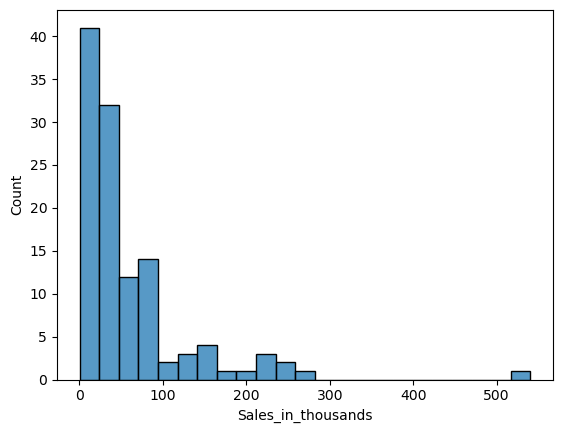

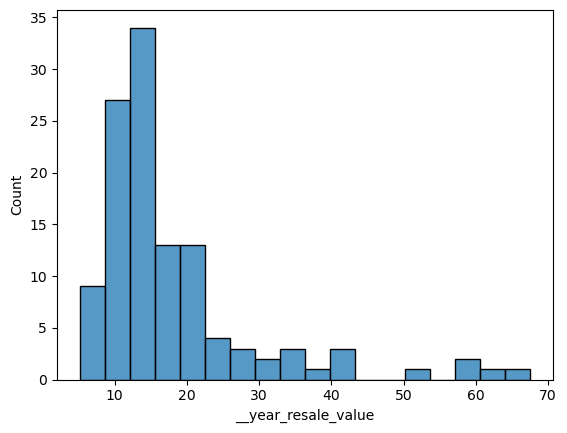

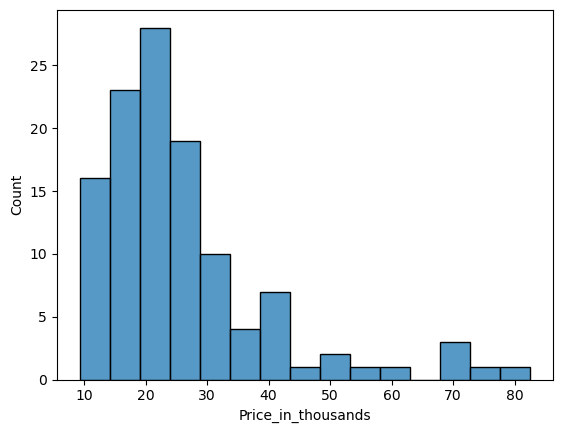

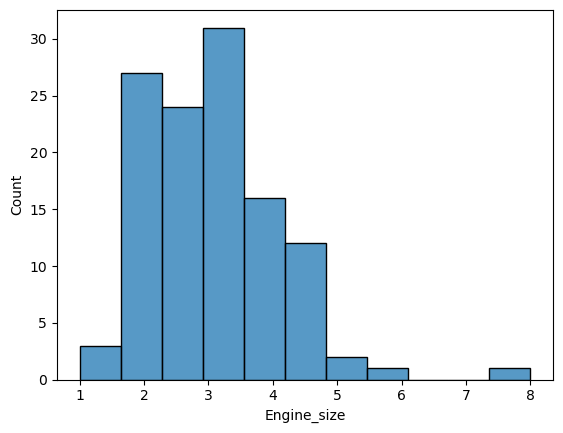

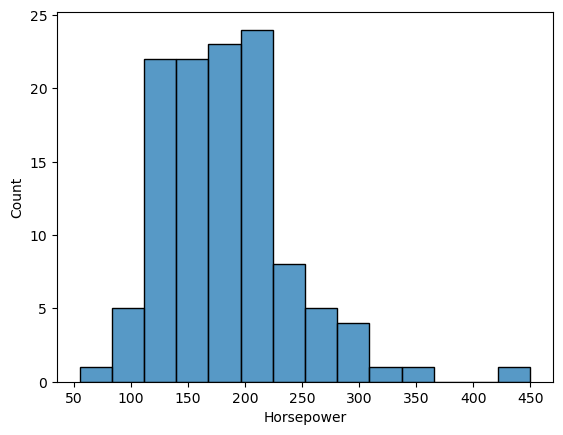

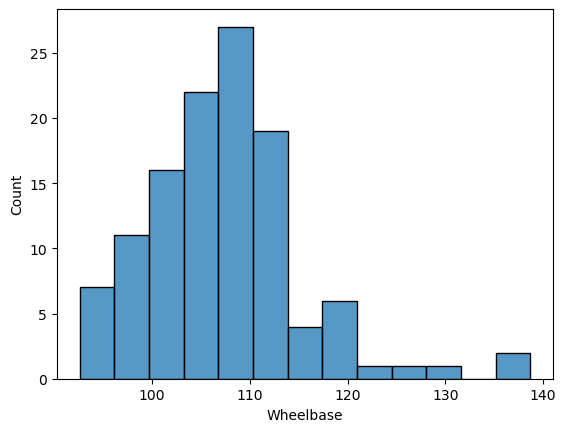

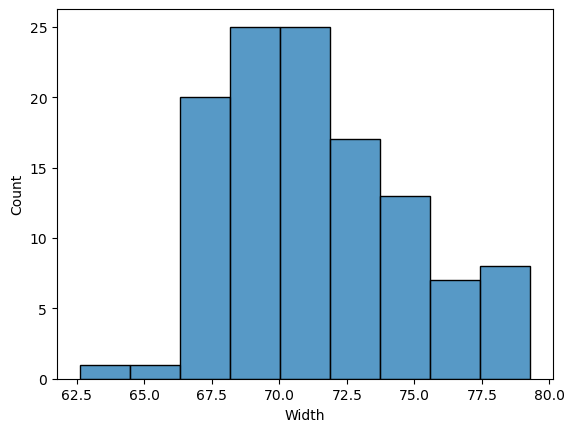

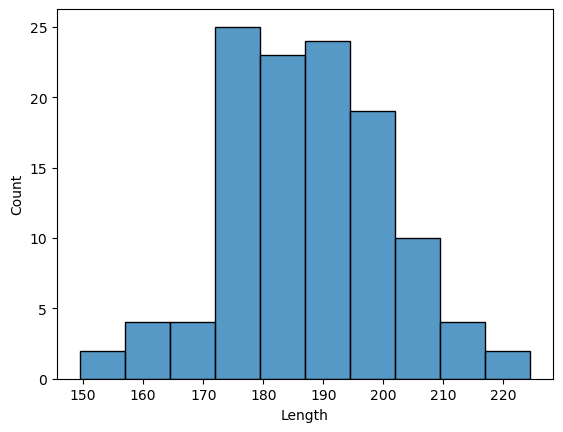

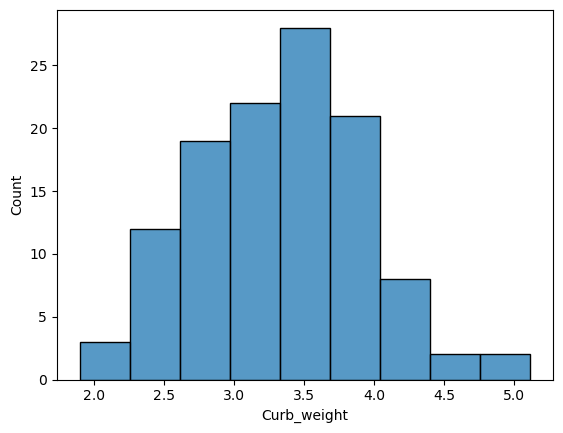

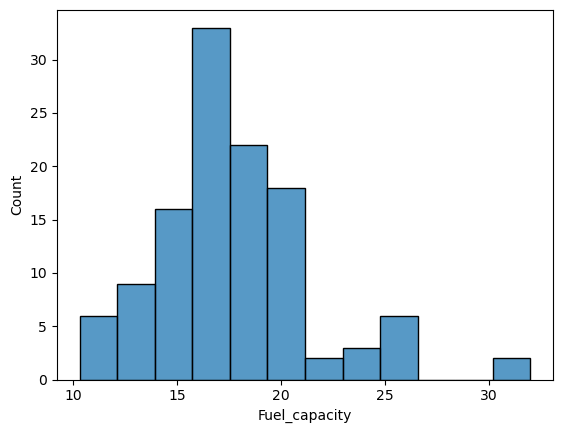

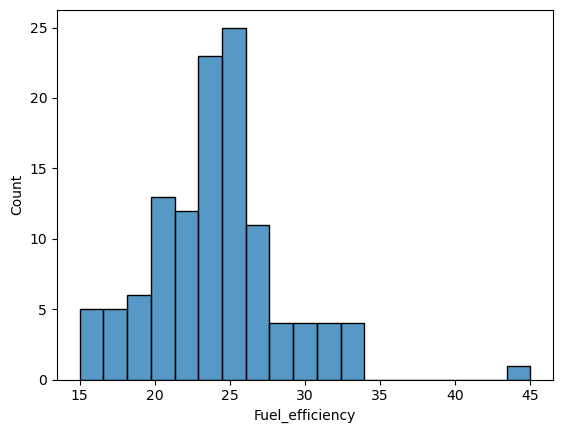

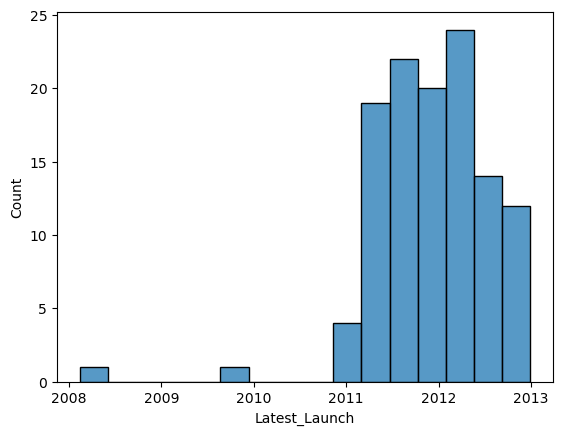

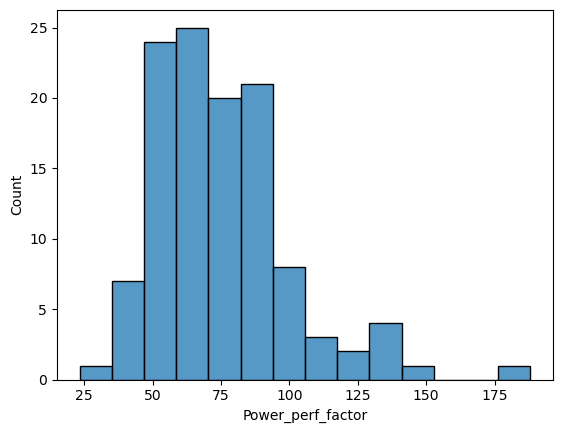

In [10]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.histplot(x=data[i])
        plt.show()

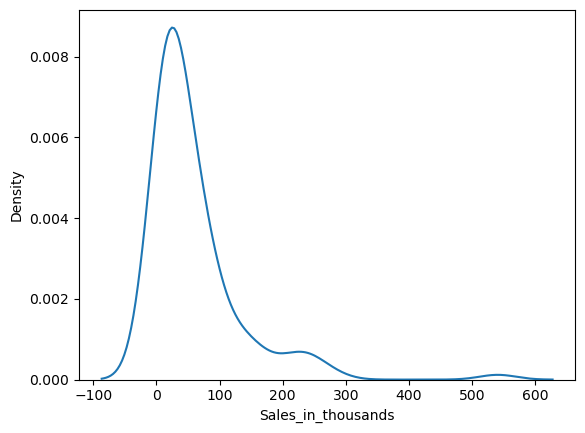

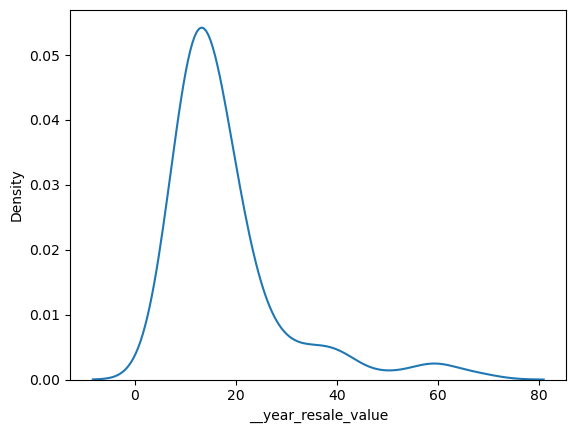

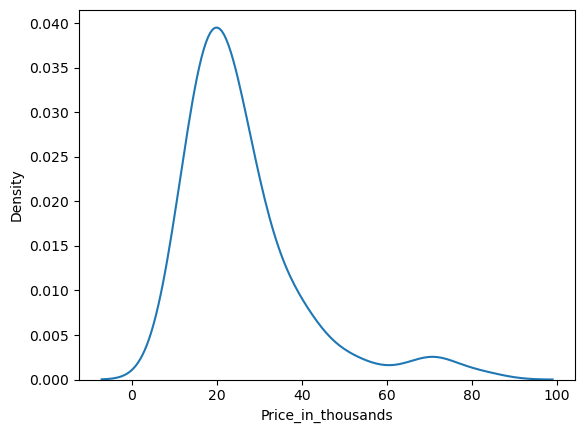

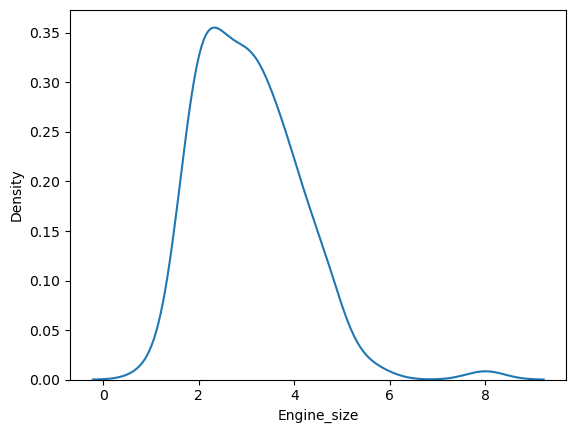

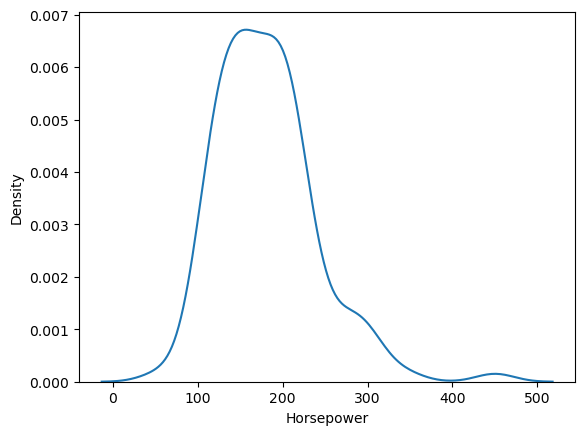

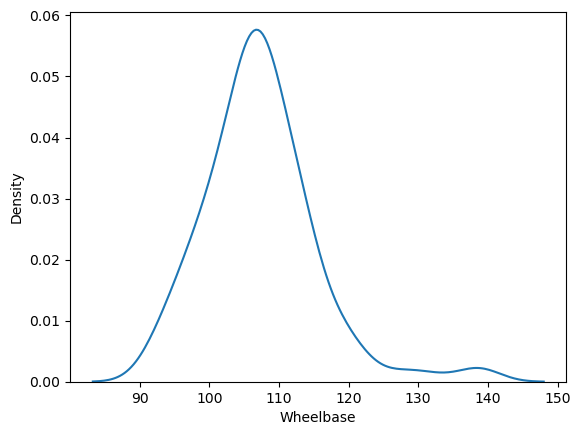

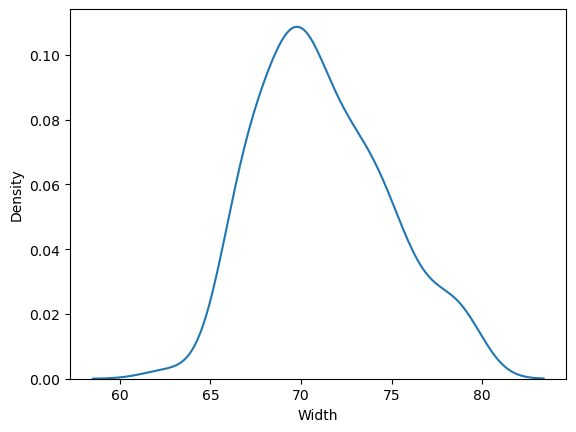

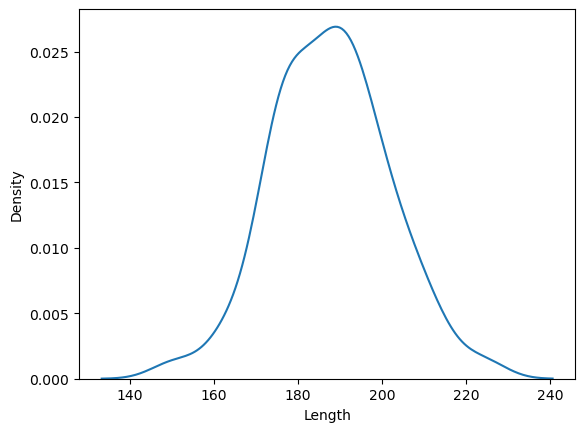

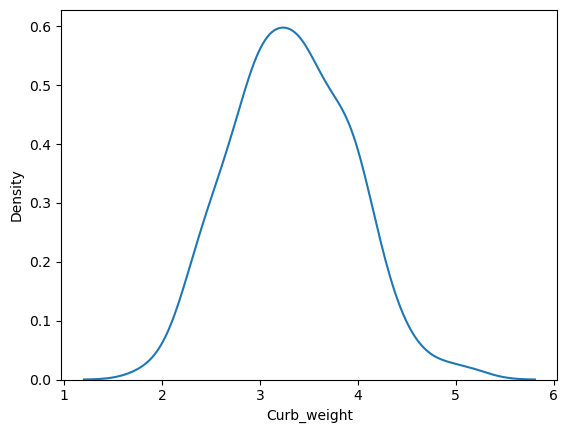

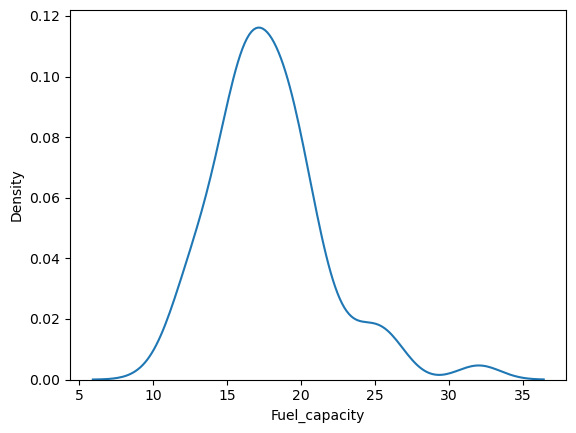

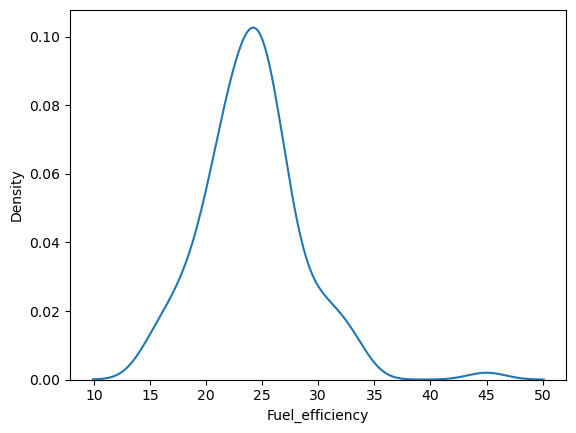

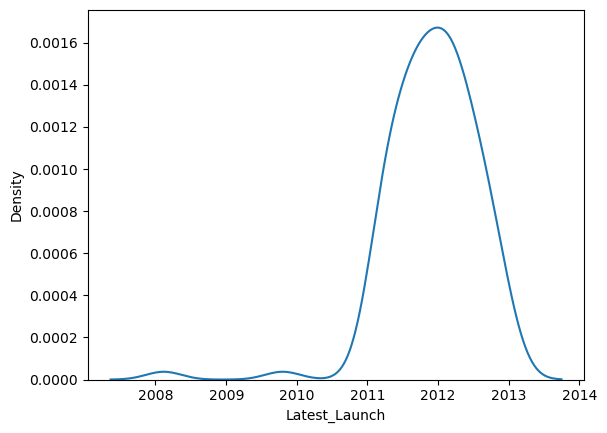

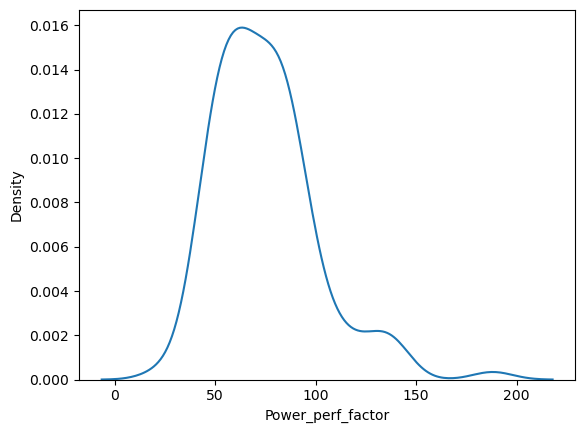

In [11]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.kdeplot(x=data[i])
        plt.show()

#### Box plot for Numerical columns

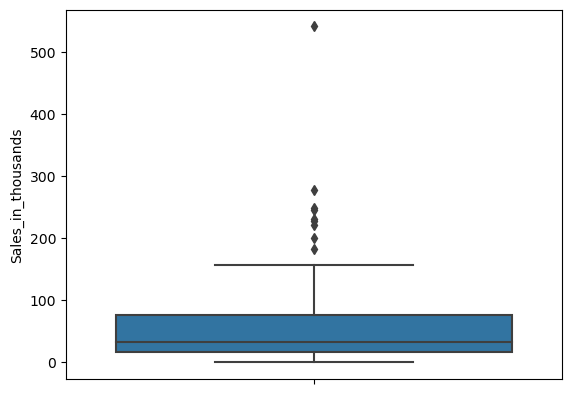

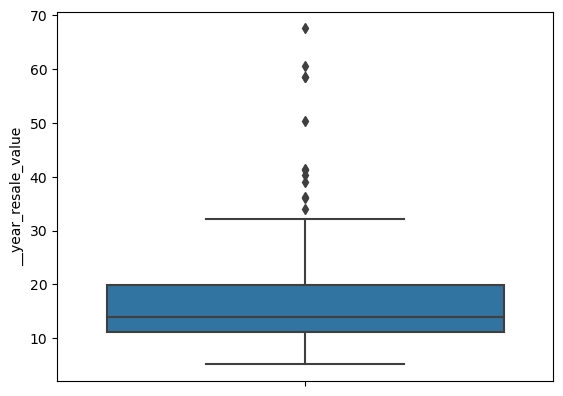

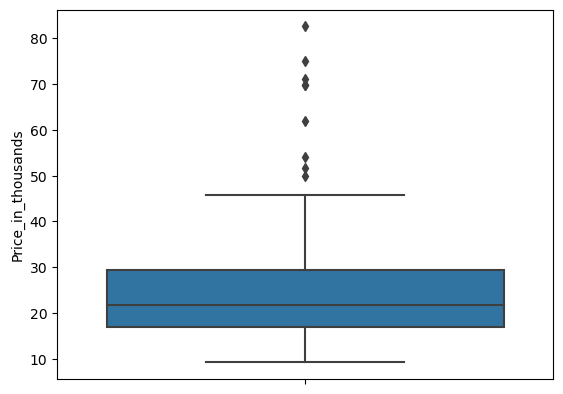

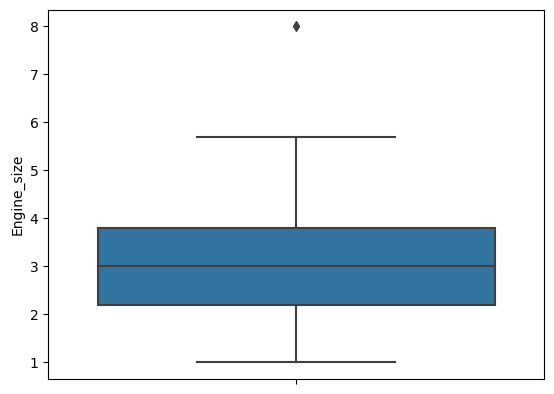

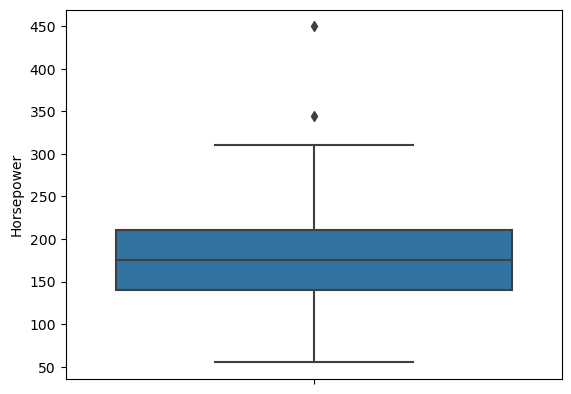

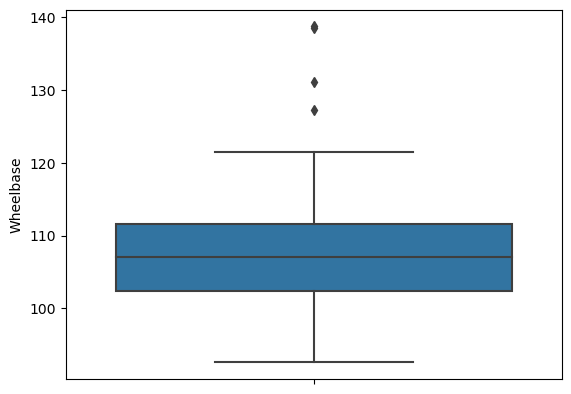

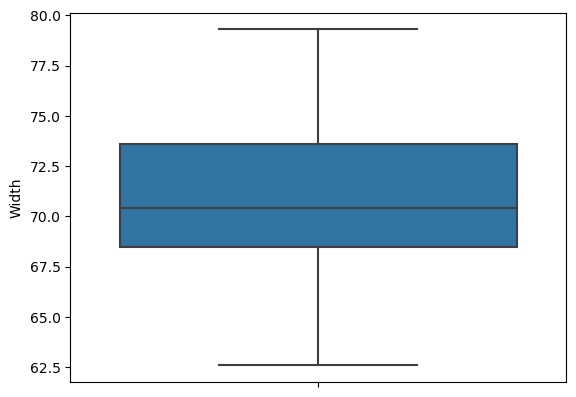

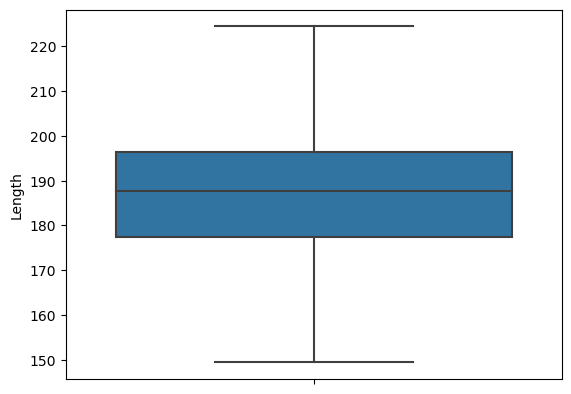

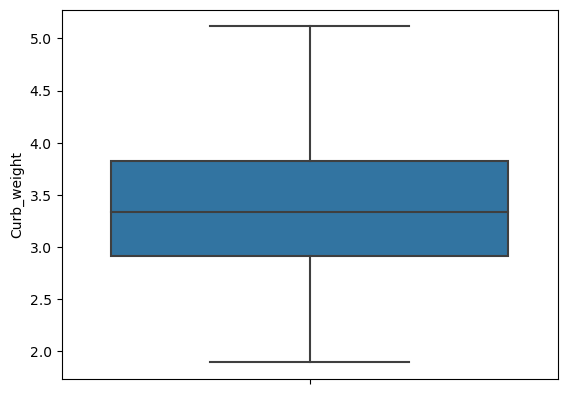

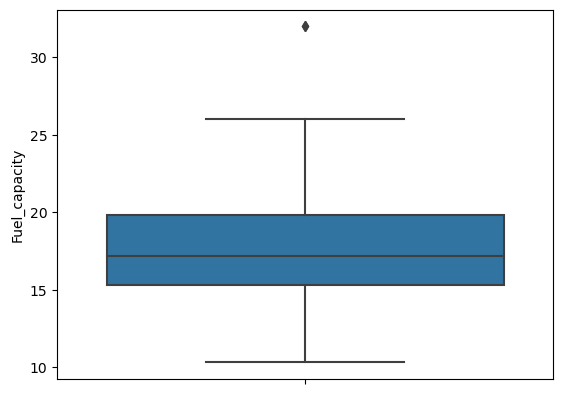

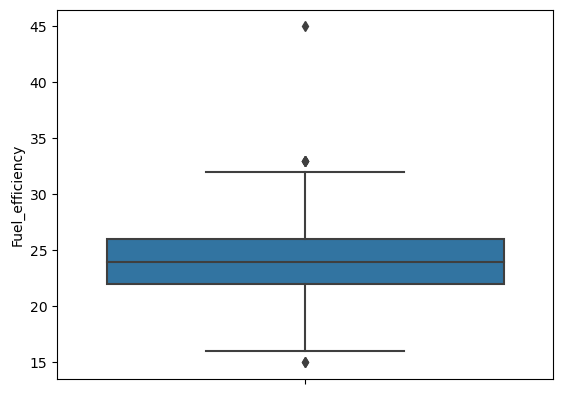

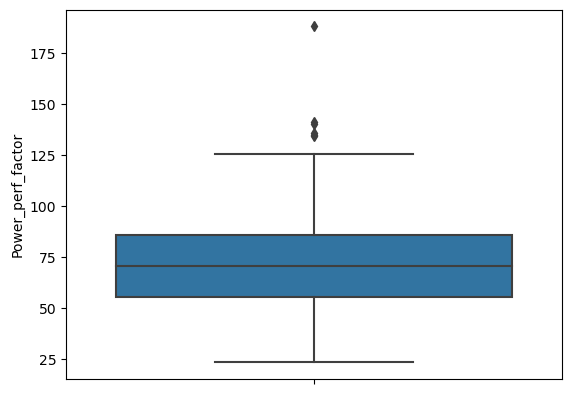

In [12]:
for i in data.columns:
    if data[i].dtypes !='object' and data[i].dtypes !='datetime64[ns]':
        sns.boxplot(y=data[i])
        plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         117 non-null    object        
 1   Model                117 non-null    object        
 2   Sales_in_thousands   117 non-null    float64       
 3   __year_resale_value  117 non-null    float64       
 4   Vehicle_type         117 non-null    object        
 5   Price_in_thousands   117 non-null    float64       
 6   Engine_size          117 non-null    float64       
 7   Horsepower           117 non-null    float64       
 8   Wheelbase            117 non-null    float64       
 9   Width                117 non-null    float64       
 10  Length               117 non-null    float64       
 11  Curb_weight          117 non-null    float64       
 12  Fuel_capacity        117 non-null    float64       
 13  Fuel_efficiency      117 non-null  

### Outlier Treatment

In [14]:
columns = ['Sales_in_thousands','__year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase','Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency','Power_perf_factor']

In [36]:
def out_limit(columns):
    Q3,Q1 = np.nanpercentile(columns,[75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL,LL

In [37]:
for i in columns:
    UL,LL = out_limit(data[i])
    data[i] = np.where((data[i] > UL) | (data[i] < LL), np.nan, data[i])

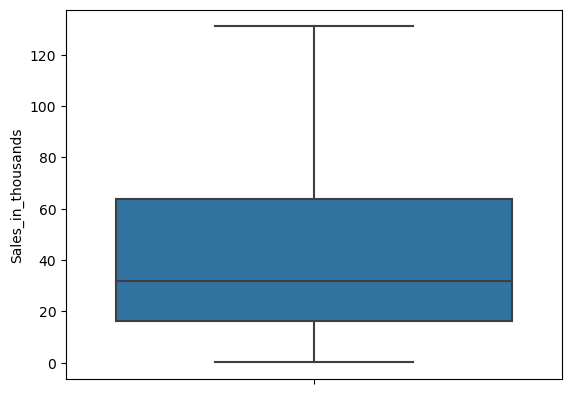

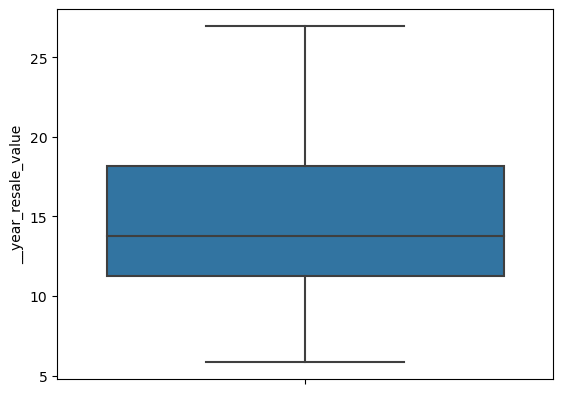

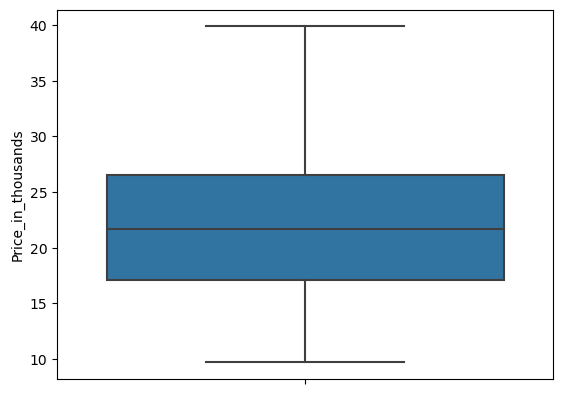

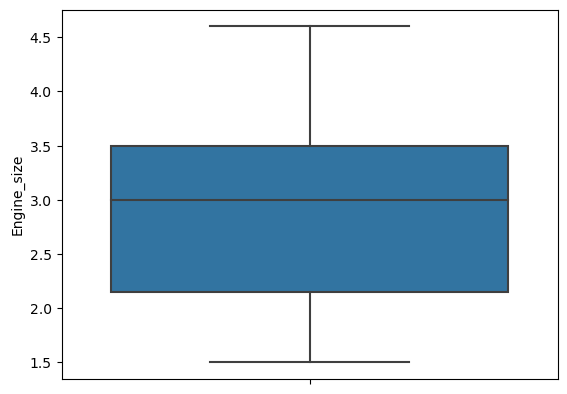

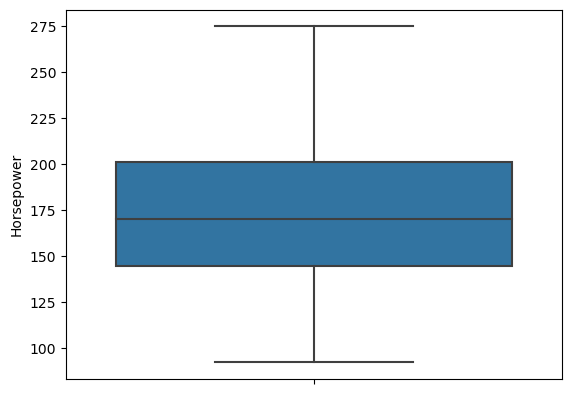

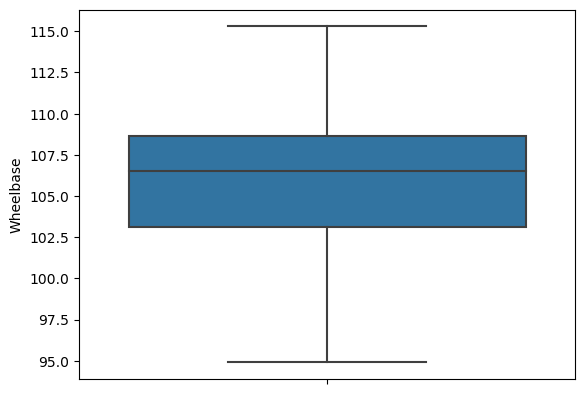

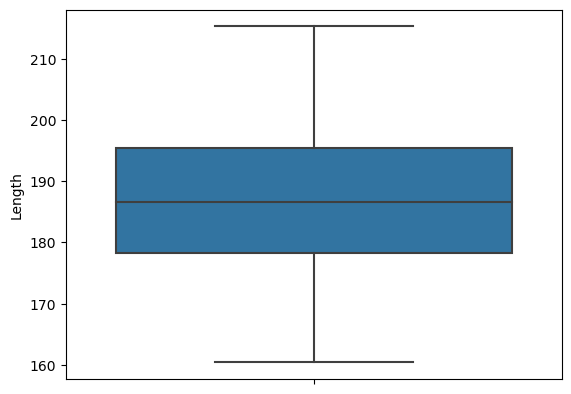

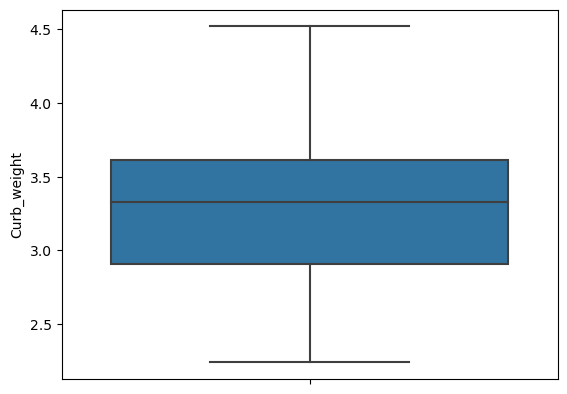

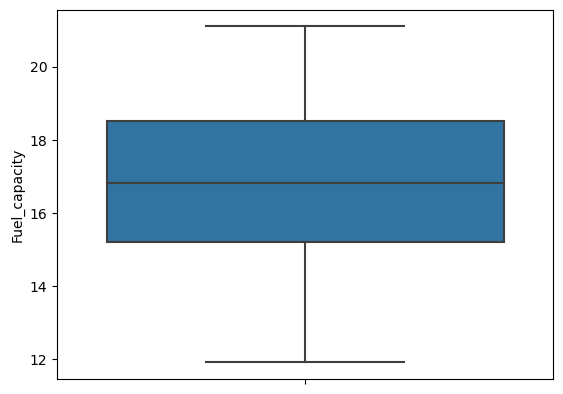

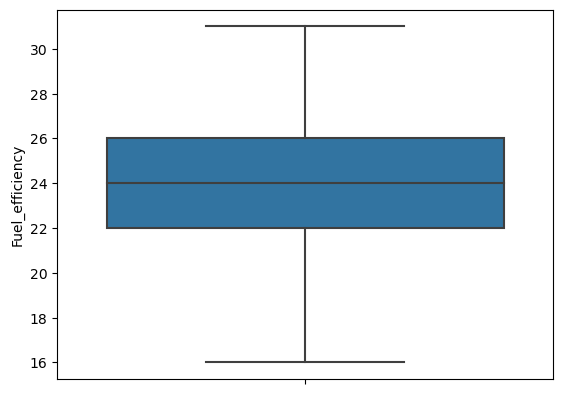

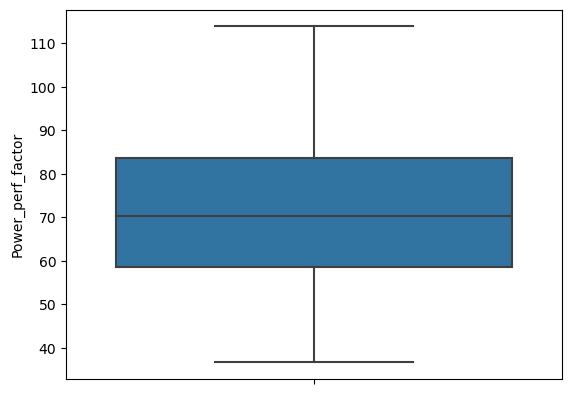

In [38]:
for i in columns:
        sns.boxplot(y=data[i])
        plt.show()

In [39]:
data.dropna(inplace=True)

## Label Encoding the categorical columns

In [40]:
le = LabelEncoder()

In [41]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])

### Checking the correlation with target of Price in Thousands

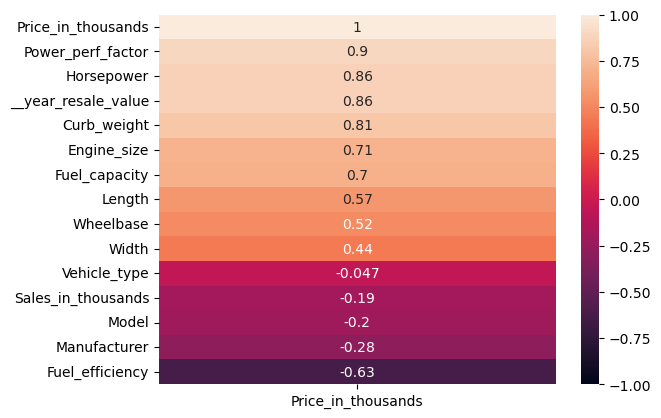

In [42]:
sns.heatmap(data.corr()[['Price_in_thousands']].sort_values(by='Price_in_thousands', ascending=False), vmin=-1, vmax=1, annot=True);

In [43]:
x = data[['Horsepower','Power_perf_factor','__year_resale_value','Curb_weight']].values

In [44]:
y = data[['Price_in_thousands']].values

In [45]:
x

array([[140.        ,  58.28014952,  16.36      ,   2.639     ],
       [225.        ,  91.37077766,  19.875     ,   3.517     ],
       [150.        ,  62.7776392 ,  22.255     ,   2.998     ],
       [200.        ,  84.56510502,  23.555     ,   3.561     ],
       [175.        ,  71.18145132,  12.475     ,   3.368     ],
       [240.        ,  95.63670253,  13.74      ,   3.543     ],
       [205.        ,  85.82840825,  20.19      ,   3.778     ],
       [205.        ,  84.25452581,  13.36      ,   3.591     ],
       [275.        , 113.8545976 ,  22.525     ,   3.978     ],
       [275.        , 113.7658739 ,  25.725     ,   3.843     ],
       [200.        ,  83.48309358,  18.225     ,   3.77      ],
       [175.        ,  69.9913956 ,  10.31      ,   3.33      ],
       [180.        ,  72.03091719,  11.525     ,   3.34      ],
       [200.        ,  81.11854333,  13.025     ,   3.5       ],
       [163.        ,  65.95718396,  12.36      ,   2.967     ],
       [168.        ,  69

### Feature Scaling

In [46]:
rs = RobustScaler()

In [47]:
x = rs.fit_transform(x)

### Model Building

In [48]:
models = {
    "LinearRigression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR": LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [49]:
for name,model in models.items():
    scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=20, n_jobs=-1)
    print("Cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("Average RMSE : ",rmse_average)
    print("*"*100)

Cross validation model : LinearRigression
Average RMSE :  0.2379539393456031
****************************************************************************************************
Cross validation model : Ridge
Average RMSE :  1.745153628397162
****************************************************************************************************
Cross validation model : LinearSVR
Average RMSE :  1.8881294706284817
****************************************************************************************************
Cross validation model : DecisionTreeRegressor
Average RMSE :  2.781547752819488
****************************************************************************************************
Cross validation model : GradientBoostingRegressor
Average RMSE :  2.180531280927025
****************************************************************************************************
Cross validation model : AdaBoostRegressor
Average RMSE :  2.1032949303008843
***************************************

#### Here Linear Regression is having the highest performance, so proceed  with it

In [51]:
model = LinearRegression()

##### Splitting data

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=43, shuffle=True)

<b>Model Fitting

In [53]:
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_predict = model.predict(x_test)

In [55]:
r2_score(y_test,y_predict)

0.9979214768466266

<b> Testing accuracy

In [56]:
model.score(x_test,y_test)

0.9979214768466266

<b>Training accuracy

In [57]:
model.score(x_train,y_train)

0.9988934613979668

In [58]:
mean_absolute_error(y_test,y_predict)

0.19300873267555532

In [59]:
mean_squared_error(y_test,y_predict)

0.05817613785175368

In [60]:
np.sqrt(mean_squared_error(y_test,y_predict))

0.2411973006726105

In [61]:
OUTPUT = pd.DataFrame(zip(y_test,y_predict), columns=['Actual','Predicted'], dtype=float)

In [62]:
OUTPUT.head()

,Actual,Predicted
0,31.598,32.051561
1,21.560,22.023737
2,14.900,14.983754
3,31.505,31.593216
4,24.340,24.539628


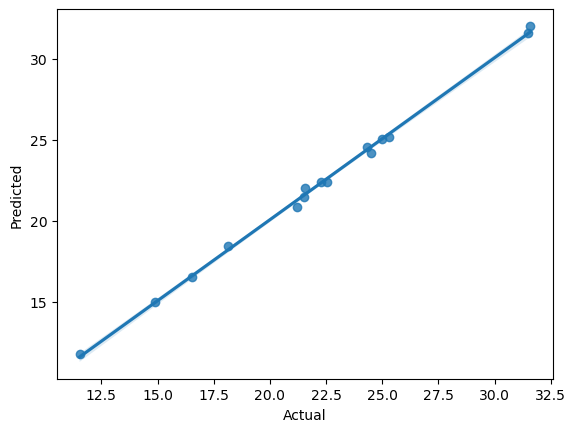

In [63]:
sns.regplot(data=OUTPUT, x="Actual" , y="Predicted");